In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import quad
import os
import nbimporter
os.chdir("..")
%run -i refugee_class_discrete.ipynb

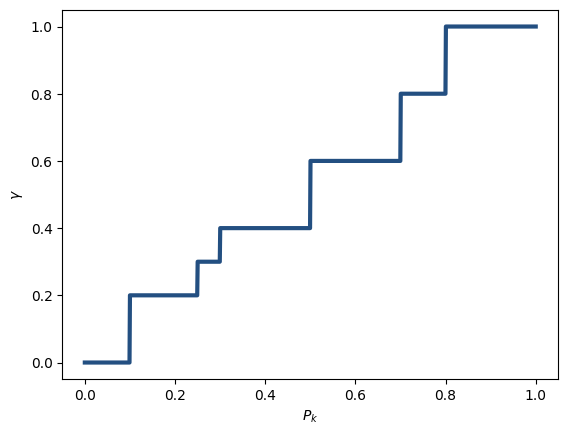

In [5]:
fig = plt.figure()
colors = sns.color_palette("crest", 5)
ax = fig.add_subplot()
ax.set_prop_cycle('color', colors)
bins = np.linspace(0,1,1000)
def indicator(bin):
    if bin <= 0.1:
        return 0
    elif bin <= 0.25:
        return 0.2
    elif bin <= 0.3:
        return 0.3
    elif bin <= 0.5:
        return 0.4
    elif bin <= 0.7:
        return 0.6
    elif bin <= 0.8:
        return 0.8 
    else:
        return 1
ind = []
for b in bins: ind.append(indicator(b))
ax.plot(bins, ind, color = colors[-1], linewidth = 3)
ax.set_xlabel("$P_k$")
ax.set_ylabel("$\gamma$")
plt.savefig("profiles/plots/escape_indicator.png", dpi = 300)

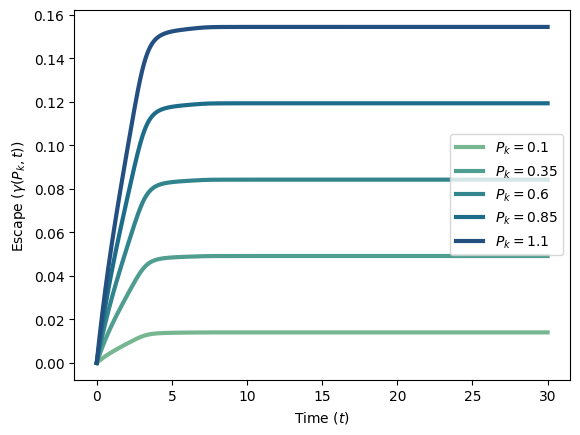

In [12]:
def dang(t, bin):
    return  (0.5*bin/(1 + (t - 3)**2) + 0.5*bin/(1 + (t - 7)**2))

def integ_dang(t, bin):
    return dang(t,bin)*np.exp(-t)


fig = plt.figure()
ax = fig.add_subplot()
colors = sns.color_palette("crest", 5)
ax.set_prop_cycle('color', colors)
ts = np.arange(0,3*10**4)*1e-3
bins = np.linspace(0.1,1.1,5)
for i in bins:
    dangs = []
    for t in ts:
        dangs.append(quad(integ_dang, 0, t, args = (i,))[0])
    ax.plot(ts, dangs, label = "$P_k = " + str(i) + "$", linewidth = 3)
ax.legend()
ax.set_xlabel("Time $(t)$")
ax.set_ylabel("Escape ($\gamma(P_k,t)$)")
plt.savefig("profiles/plots/integ_exp.png", dpi = 300)